In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/kaggle/input/250k-medicines-usage-side-effects-and-substitutes/medicine_dataset.csv', 
                 low_memory=False)

# Show shape (rows, columns)
print("Dataset shape:", df.shape)

# Show column names
print("\nColumns:")
print(df.columns.tolist())

# Show first 5 rows
df.head()


Dataset shape: (248218, 58)

Columns:
['id', 'name', 'substitute0', 'substitute1', 'substitute2', 'substitute3', 'substitute4', 'sideEffect0', 'sideEffect1', 'sideEffect2', 'sideEffect3', 'sideEffect4', 'sideEffect5', 'sideEffect6', 'sideEffect7', 'sideEffect8', 'sideEffect9', 'sideEffect10', 'sideEffect11', 'sideEffect12', 'sideEffect13', 'sideEffect14', 'sideEffect15', 'sideEffect16', 'sideEffect17', 'sideEffect18', 'sideEffect19', 'sideEffect20', 'sideEffect21', 'sideEffect22', 'sideEffect23', 'sideEffect24', 'sideEffect25', 'sideEffect26', 'sideEffect27', 'sideEffect28', 'sideEffect29', 'sideEffect30', 'sideEffect31', 'sideEffect32', 'sideEffect33', 'sideEffect34', 'sideEffect35', 'sideEffect36', 'sideEffect37', 'sideEffect38', 'sideEffect39', 'sideEffect40', 'sideEffect41', 'use0', 'use1', 'use2', 'use3', 'use4', 'Chemical Class', 'Habit Forming', 'Therapeutic Class', 'Action Class']


,id,name,substitute0,substitute1,substitute2,substitute3,substitute4,sideEffect0,sideEffect1,sideEffect2,...,sideEffect41,use0,use1,use2,use3,use4,Chemical Class,Habit Forming,Therapeutic Class,Action Class
0,1,augmentin 625 duo tablet,Penciclav 500 mg/125 mg Tablet,Moxikind-CV 625 Tablet,Moxiforce-CV 625 Tablet,Fightox 625 Tablet,Novamox CV 625mg Tablet,Vomiting,Nausea,Diarrhea,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,NaN,No,ANTI INFECTIVES,NaN
1,2,azithral 500 tablet,Zithrocare 500mg Tablet,Azax 500 Tablet,Zady 500 Tablet,Cazithro 500mg Tablet,Trulimax 500mg Tablet,Vomiting,Nausea,Abdominal pain,...,NaN,Treatment of Bacterial infections,NaN,NaN,NaN,NaN,Macrolides,No,ANTI INFECTIVES,Macrolides
2,3,ascoril ls syrup,Solvin LS Syrup,Ambrodil-LX Syrup,Zerotuss XP Syrup,Capex LS Syrup,Broxum LS Syrup,Nausea,Vomiting,Diarrhea,...,NaN,Treatment of Cough with mucus,NaN,NaN,NaN,NaN,NaN,No,RESPIRATORY,NaN
3,4,allegra 120mg tablet,Lcfex Tablet,Etofex 120mg Tablet,Nexofex 120mg Tablet,Fexise 120mg Tablet,Histafree 120 Tablet,Headache,Drowsiness,Dizziness,...,NaN,Treatment of Sneezing and runny nose due to al...,Treatment of Allergic conditions,NaN,NaN,NaN,Diphenylmethane Derivative,No,RESPIRATORY,H1 Antihistaminics (second Generation)
4,5,avil 25 tablet,Eralet 25mg Tablet,NaN,NaN,NaN,NaN,Sleepiness,Dryness in mouth,NaN,...,NaN,Treatment of Allergic conditions,NaN,NaN,NaN,NaN,Pyridines Derivatives,No,RESPIRATORY,H1 Antihistaminics (First Generation)


In [3]:
# Check missing values
missing = df.isnull().sum().sort_values(ascending=False)
print("Top 10 columns with missing values:")
print(missing.head(10))

Top 10 columns with missing values:
sideEffect39    248216
sideEffect41    248216
sideEffect37    248216
sideEffect38    248216
sideEffect35    248216
sideEffect40    248216
sideEffect36    248216
sideEffect34    247052
sideEffect33    247049
sideEffect32    246890
dtype: int64


Top 20 most common side effects:
Nausea                               157428
Diarrhea                             140295
Vomiting                             100331
Headache                              99015
Dizziness                             72637
Stomach pain                          50603
Rash                                  35749
Dryness in mouth                      33984
Sleepiness                            33516
Flatulence                            32045
Abdominal pain                        31851
Indigestion                           31836
Constipation                          29196
Fatigue                               26634
Loss of appetite                      24117
Increased liver enzymes               18093
Allergic reaction                     17881
Heartburn                             17738
Weakness                              15214
Insomnia (difficulty in sleeping)     15070
Name: count, dtype: int64


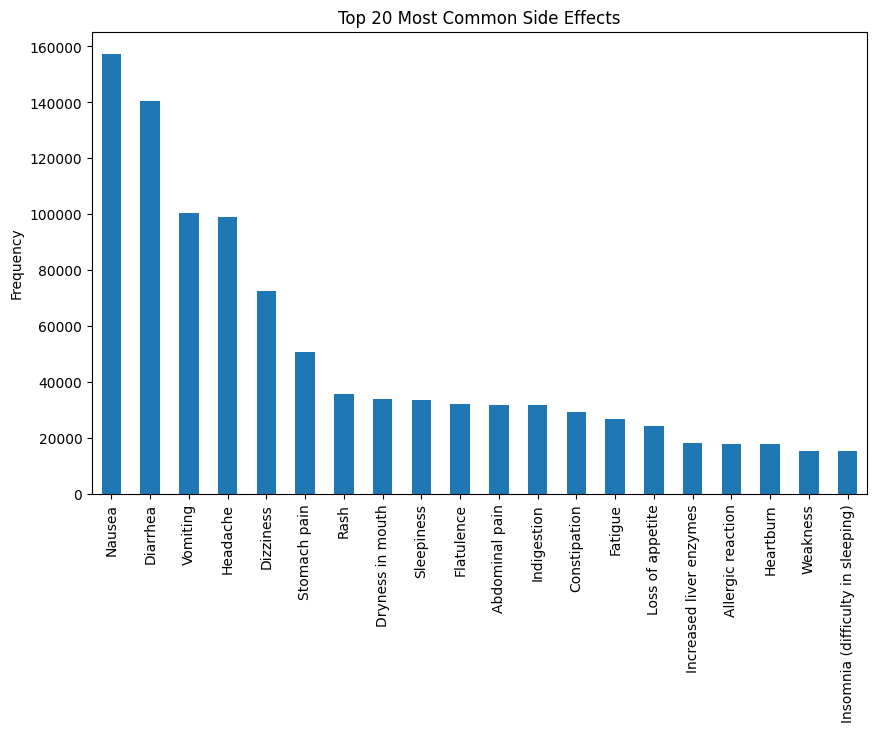

In [4]:
# Combine all sideEffect columns into a single series
side_effect_cols = [col for col in df.columns if "sideEffect" in col]

# Flatten all values into one list, drop NaN
all_side_effects = df[side_effect_cols].values.ravel()
all_side_effects = pd.Series(all_side_effects).dropna()

# Count frequency
side_effect_counts = all_side_effects.value_counts().head(20)

print("Top 20 most common side effects:")
print(side_effect_counts)

# Visualization
plt.figure(figsize=(10,6))
side_effect_counts.plot(kind='bar')
plt.title("Top 20 Most Common Side Effects")
plt.ylabel("Frequency")
plt.show()
